In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def v_viento(alpha,z_ref,v_ref,Z):
    return v_ref*(Z/z_ref)**alpha

def D_H(v_h,d,v_l,St,beta):
    return np.sqrt((v_h*d)**2/((v_l**2)*(1-16*(St**2)*(beta**2))))

In [3]:
#Definición de parámetros de diseño
d = 0.18 #m
L = 2 #m
H = 6 #m
D = 0.43#m
rho = 100
beta = 0.1
f = 10.14


#Definición de parámetros de viento
alpha = 0.14
v_ref = 12 #m/s
y_ref = 10 #m/s
St = 0.21
rho_air = 1.125 #Kg/m^3
v_l = v_viento(alpha,y_ref,v_ref,L/2)

In [4]:
#Función potencia
def Pot(rho_air,v_ref,y_ref,alpha,d,D,L,H):
    return 0.5*rho_air*((v_ref/y_ref**alpha)**3)*((d-((D-d)*L/(2*H-L)))*(((H**(3*alpha+1))/(3*alpha+1))-((L**(3*alpha+1))/((6*alpha+2)*2**(3*alpha))))+((D-d)/(H-(L/2)))*(((H**(3*alpha+2))/(3*alpha+2))-((L**(3*alpha+2))/((12*alpha+8)*2**(3*alpha)))))



#Función potencia mecanica
def Pot_mec(rho,beta,D,d,v_l,v_ref,y_ref,St,v_h,H,L,alpha,f):
    return 2*f*((np.pi**3)/2)*rho*(f**2)*(beta**2)*(D**2)*((d**2)/(v_l**2))*(((v_ref**2)/((((H-(L/2)))**2)*(y_ref**(2*alpha))))*((((H**(2*alpha+3))/(2*alpha+3))-((L**(2*alpha+3))/((16*alpha+24)*2**(2*alpha))))-L*(((H**(2*alpha+2))/(2*alpha+2))-((L**(2*alpha+2))/((8*alpha+8)*2**(2*alpha))))+((L/2)**2)*(((H**(2*alpha+1))/(2*alpha+1))-((L**(2*alpha+1))/((4*alpha+2)*2**(2*alpha)))))+((16*(St*beta*v_h)**2)/(1-16*(St*beta)**2))*((H-(L/2))/5))



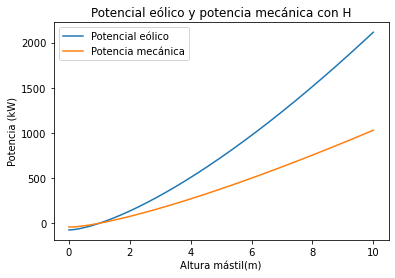

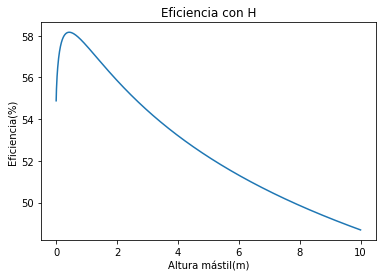

In [5]:
#Variación con la altura
n = 1000
H_vec = np.linspace(0,10,n)
Pot_vec = np.zeros(n)
E_vec = np.zeros(n)
ef = np.zeros(n)

for i in range(n):
    v_h = v_viento(alpha,y_ref,v_ref,H_vec[i])
    Pot_vec[i] = Pot(rho_air,v_ref,y_ref,alpha,d,D,L,H_vec[i])
    E_vec[i] = Pot_mec(rho,beta,D,d,v_l,v_ref,y_ref,St,v_h,H_vec[i],L,alpha,f)
    ef[i] = 100*E_vec[i]/Pot_vec[i]

plt.plot(H_vec,Pot_vec,label='Potencial eólico')
plt.plot(H_vec,E_vec,label = 'Potencia mecánica')
plt.legend()
plt.ylabel('Potencia (kW)')
plt.xlabel('Altura mástil(m)')
plt.title('Potencial eólico y potencia mecánica con H')
plt.show()

plt.plot(H_vec,ef)
plt.ylabel('Eficiencia(%)')
plt.xlabel('Altura mástil(m)')
plt.title('Eficiencia con H')
plt.show()



Se alcanza un pico en la eficiencia y luego se va hacia cero. Es decir, haciendo el mástil infinitamente grande no puedo generar infinita energía

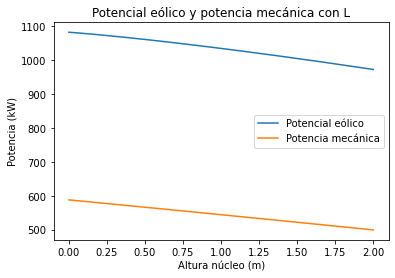

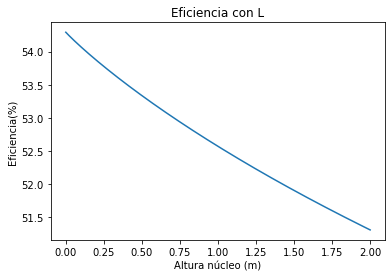

In [6]:
#Variación con L
n = 1000
L_vec = np.linspace(0,2,n)
Pot_vec = np.zeros(n)
E_vec = np.zeros(n)
ef = np.zeros(n)

for i in range(n):
    v_h = v_viento(alpha,y_ref,v_ref,H)
    Pot_vec[i] = Pot(rho_air,v_ref,y_ref,alpha,d,D,L_vec[i],H)
    E_vec[i] = Pot_mec(rho,beta,D,d,v_l,v_ref,y_ref,St,v_h,H,L_vec[i],alpha,f)
    ef[i] = 100*E_vec[i]/Pot_vec[i]

plt.plot(L_vec,Pot_vec,label='Potencial eólico')
plt.plot(L_vec,E_vec,label = 'Potencia mecánica')
plt.legend()
plt.ylabel('Potencia (kW)')
plt.xlabel('Altura núcleo (m)')
plt.title('Potencial eólico y potencia mecánica con L')
plt.show()

plt.plot(L_vec,ef)
plt.ylabel('Eficiencia(%)')
plt.xlabel('Altura núcleo (m)')
plt.title('Eficiencia con L')
plt.show()




La eficiencia decrece según se aumenta la longitud del núcleo. Puede tener sentido porque se le está quitando longitud al mástil (que es el que aprovecha la energía) al aumentar la longitud del núcleo.

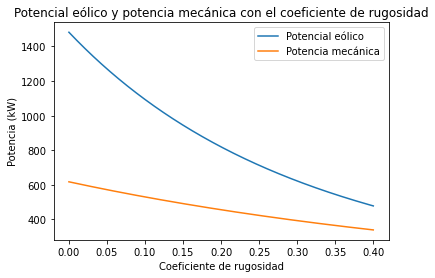

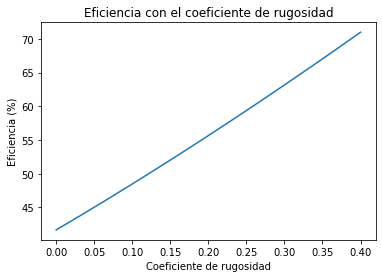

In [7]:
#Variación con alpha
n = 1000
alpha_vec = np.linspace(0,0.4,n)
Pot_vec = np.zeros(n)
E_vec = np.zeros(n)
ef = np.zeros(n)

for i in range(n):
    v_h = v_viento(alpha_vec[i],y_ref,v_ref,H)
    Pot_vec[i] = Pot(rho_air,v_ref,y_ref,alpha_vec[i],d,D,L,H)
    E_vec[i] = Pot_mec(rho,beta,D,d,v_l,v_ref,y_ref,St,v_h,H,L,alpha_vec[i],f)
    ef[i] = 100*E_vec[i]/Pot_vec[i]

plt.plot(alpha_vec,Pot_vec,label='Potencial eólico')
plt.plot(alpha_vec,E_vec,label = 'Potencia mecánica')
plt.legend()
plt.ylabel('Potencia (kW)')
plt.xlabel('Coeficiente de rugosidad')
plt.title('Potencial eólico y potencia mecánica con el coeficiente de rugosidad')
plt.show()

plt.plot(alpha_vec,ef)
plt.ylabel('Eficiencia (%)')
plt.xlabel('Coeficiente de rugosidad')
plt.title('Eficiencia con el coeficiente de rugosidad')
plt.show()

En teoría estos dispositivos operan mejor en regimen turbulento por lo que puede ser razonable que al aumentar la rugosidad la eficiencia aumente

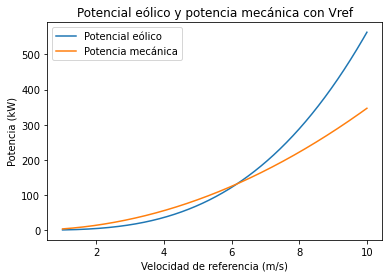

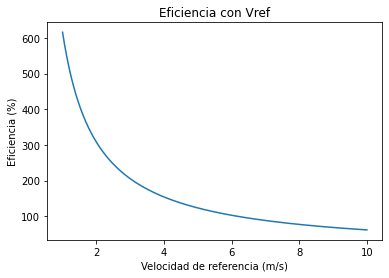

In [8]:
#Variación con la v_ref
n = 1000
v_vec = np.linspace(1,10,n)
Pot_vec = np.zeros(n)
E_vec = np.zeros(n)
ef = np.zeros(n)

for i in range(n):
    v_h = v_viento(alpha,y_ref,v_vec[i],H)
    Pot_vec[i] = Pot(rho_air,v_vec[i],y_ref,alpha,d,D,L,H)
    E_vec[i] = Pot_mec(rho,beta,D,d,v_l,v_vec[i],y_ref,St,v_h,H,L,alpha,f)
    ef[i] = 100*E_vec[i]/Pot_vec[i]

plt.plot(v_vec,Pot_vec,label='Potencial eólico')
plt.plot(v_vec,E_vec,label = 'Potencia mecánica')
plt.legend()
plt.ylabel('Potencia (kW)')
plt.xlabel('Velocidad de referencia (m/s)')
plt.title('Potencial eólico y potencia mecánica con Vref')
plt.show()

plt.plot(v_vec,ef)
plt.ylabel('Eficiencia (%)')
plt.xlabel('Velocidad de referencia (m/s)')
plt.title('Eficiencia con Vref')
plt.show()

Siguiendo la linea del comentario en alpha, al disminuir la velocidad de referencia alpha aumenta y por tanto a eficiencia aumenta.

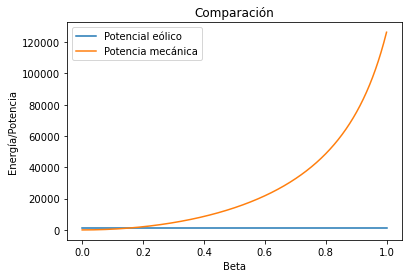

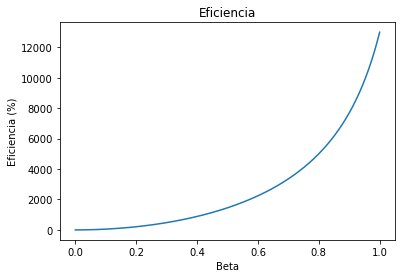

In [9]:
#Variación con la beta
n = 1000
beta_vec = np.linspace(0,1,n)
Pot_vec = np.zeros(n)
E_vec = np.zeros(n)
ef = np.zeros(n)

for i in range(n):
    v_h = v_viento(alpha,y_ref,v_ref,H)
    Pot_vec[i] = Pot(rho_air,v_ref,y_ref,alpha,d,D,L,H)
    E_vec[i] = Pot_mec(rho,beta_vec[i],D,d,v_l,v_ref,y_ref,St,v_h,H,L,alpha,f)
    ef[i] = 100*E_vec[i]/Pot_vec[i]

plt.plot(beta_vec,Pot_vec,label='Potencial eólico')
plt.plot(beta_vec,E_vec,label = 'Potencia mecánica')
plt.legend()
plt.ylabel('Energía/Potencia')
plt.xlabel('Beta')
plt.title('Comparación')
plt.show()

plt.plot(beta_vec,ef)
plt.ylabel('Eficiencia (%)')
plt.xlabel('Beta')
plt.title('Eficiencia')
plt.show()

$\beta$ es una medida de la amplitud de oscilación, cuando esta aumenta es porque la energía se está aprovechando mejor y por tanto ha de aumentar la eficiencia. (Analizar con cuidado el sentido físico detrás de $\eta = 1$. ¿Podría ser la resonancia?

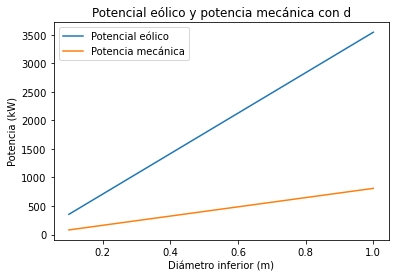

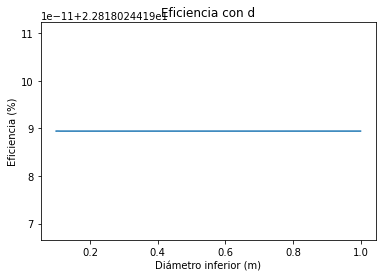

In [10]:
#Variación con d
n = 1000
d_vec = np.linspace(0.1,1,n)
Pot_vec = np.zeros(n)
E_vec = np.zeros(n)
ef = np.zeros(n)
D_vec = np.zeros(n)
f_vec = np.zeros(n)

for i in range(n):
    v_h = v_viento(alpha,y_ref,v_ref,H)
    D_vec[i] = D_H(v_h,d_vec[i],v_l,St,beta)
    f_vec[i] = St*v_l/d_vec[i]
    Pot_vec[i] = Pot(rho_air,v_ref,y_ref,alpha,d_vec[i],D_vec[i],L,H)
    E_vec[i] = Pot_mec(rho,beta,D_vec[i],d_vec[i],v_l,v_ref,y_ref,St,v_h,H,L,alpha,f_vec[i])
    ef[i] = 100*E_vec[i]/Pot_vec[i]

plt.plot(d_vec,Pot_vec,label='Potencial eólico')
plt.plot(d_vec,E_vec,label = 'Potencia mecánica')
plt.legend()
plt.ylabel('Potencia (kW)')
plt.xlabel('Diámetro inferior (m)')
plt.title('Potencial eólico y potencia mecánica con d')
plt.show()

plt.plot(d_vec,ef)
plt.ylabel('Eficiencia (%)')
plt.xlabel('Diámetro inferior (m)')
plt.title('Eficiencia con d')
plt.show()


La variación del diámetro inferior, superior y la frecuencia de oscilación provocan que la eficiencia sea constante por lo que de nuevo, no se puede generar energía infinita con parametros de diseño.

# Beta fija, curva eficiencia-rho


In [32]:
beta1 = 0.02
beta2 = 0.05
beta3 = 0.1
#Defino una función potencia mecánica salvo por el parámetro rho
#Función potencia mecanica
def Pot_mec_norho(beta,D,d,v_l,v_ref,y_ref,St,v_h,H,L,alpha,f):
    return 2*f*((np.pi**3)/2)*(f**2)*(beta**2)*(D**2)*((d**2)/(v_l**2))*(((v_ref**2)/((((H-(L/2)))**2)*(y_ref**(2*alpha))))*((((H**(2*alpha+3))/(2*alpha+3))-((L**(2*alpha+3))/((16*alpha+24)*2**(2*alpha))))-L*(((H**(2*alpha+2))/(2*alpha+2))-((L**(2*alpha+2))/((8*alpha+8)*2**(2*alpha))))+((L/2)**2)*(((H**(2*alpha+1))/(2*alpha+1))-((L**(2*alpha+1))/((4*alpha+2)*2**(2*alpha)))))+((16*(St*beta*v_h)**2)/(1-16*(St*beta)**2))*((H-(L/2))/5))



\begin{equation}
    \eta = \frac{rho*\text{Pot_mec_norho}}{\text{Pot_vent}}
\end{equation}

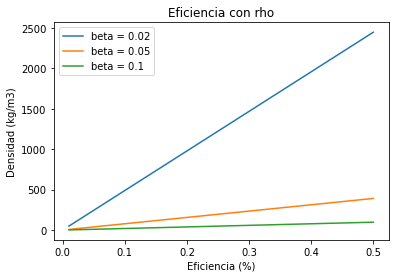

In [34]:
eta = np.linspace(0.01,0.5,50)
coc1 = (Pot_mec_norho(beta1,D,d,v_l,v_ref,y_ref,St,v_h,H,L,alpha,f))/(Pot(rho_air,v_ref,y_ref,alpha,d,D,L,H))
rho1 = eta/coc1

coc2 = (Pot_mec_norho(beta2,D,d,v_l,v_ref,y_ref,St,v_h,H,L,alpha,f))/(Pot(rho_air,v_ref,y_ref,alpha,d,D,L,H))
rho2 = eta/coc2

coc3 = (Pot_mec_norho(beta3,D,d,v_l,v_ref,y_ref,St,v_h,H,L,alpha,f))/(Pot(rho_air,v_ref,y_ref,alpha,d,D,L,H))
rho3 = eta/coc3

#print(Pot_mec_norho(beta,D,d,v_l,v_ref,y_ref,St,v_h,H,L,alpha,f))/(Pot(rho_air,v_ref,y_ref,alpha,d,D,L,H))
plt.plot(eta,rho1,label = 'beta = 0.02')
plt.plot(eta,rho2, label = 'beta = 0.05')
plt.plot(eta,rho3,label = 'beta = 0.1')
plt.legend()
plt.title('Eficiencia con rho')
plt.ylabel('Densidad (kg/m3)')
plt.xlabel('Eficiencia (%)')
plt.show()